In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Load the JSON data and check how many records are there.
import json
db = json.load(open('foods-2011-10-03.json'))
len(db)

6636

In [4]:
db[0]

{'description': 'Cheese, caraway',
 'group': 'Dairy and Egg Products',
 'id': 1008,
 'manufacturer': '',
 'nutrients': [{'description': 'Protein',
   'group': 'Composition',
   'units': 'g',
   'value': 25.18},
  {'description': 'Total lipid (fat)',
   'group': 'Composition',
   'units': 'g',
   'value': 29.2},
  {'description': 'Carbohydrate, by difference',
   'group': 'Composition',
   'units': 'g',
   'value': 3.06},
  {'description': 'Ash', 'group': 'Other', 'units': 'g', 'value': 3.28},
  {'description': 'Energy',
   'group': 'Energy',
   'units': 'kcal',
   'value': 376.0},
  {'description': 'Water',
   'group': 'Composition',
   'units': 'g',
   'value': 39.28},
  {'description': 'Energy', 'group': 'Energy', 'units': 'kJ', 'value': 1573.0},
  {'description': 'Fiber, total dietary',
   'group': 'Composition',
   'units': 'g',
   'value': 0.0},
  {'description': 'Calcium, Ca',
   'group': 'Elements',
   'units': 'mg',
   'value': 673.0},
  {'description': 'Iron, Fe',
   'group': 

In [5]:
# Check how many keys are there in 1st record.
db[0].keys()

dict_keys(['manufacturer', 'portions', 'group', 'tags', 'id', 'nutrients', 'description'])

In [6]:
# Since there are so many nutrients, check what is inside each one.
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [7]:
# Create a DataFrame for nutrients of 1st product.
from pandas import *
nutrients = DataFrame(db[0]['nutrients'])

In [8]:
print(len(nutrients))
nutrients[:5]

162


,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00


In [9]:
# From db we dont want every column.
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [10]:
# Lets see the distribution of food groups
import pandas as pd
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

In [11]:
# We need all nutrients in a single DataFrame but earlier we got dataframe containing 
# neutrients for only 1 product.
nutrients = []
for rec in db:
    fnuts = DataFrame(rec['nutrients']) 
    fnuts['id'] = rec['id'] 
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)

In [12]:
nutrients[:10]

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008
5,Water,Composition,g,39.28,1008
6,Energy,Energy,kJ,1573.00,1008
7,"Fiber, total dietary",Composition,g,0.00,1008
8,"Calcium, Ca",Elements,mg,673.00,1008
9,"Iron, Fe",Elements,mg,0.64,1008


In [13]:
# It looks there are duplicates present. Lets check if they are indeed.
nutrients.duplicated().sum()

14223

In [14]:
nutrients = nutrients.drop_duplicates()

In [15]:
# The earlier dataframe 'info' and 'nutrients' both contains column description and group.
# but they are not the same. So lets rename them.
col_mapping = {'description' : 'food', 'group' : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
col_mapping = {'description' : 'nutrient', 'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [16]:
info[:5]

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [17]:
nutrients[:5]

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [18]:
# Now we can join both the DF. 
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata[:5]

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


In [19]:
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


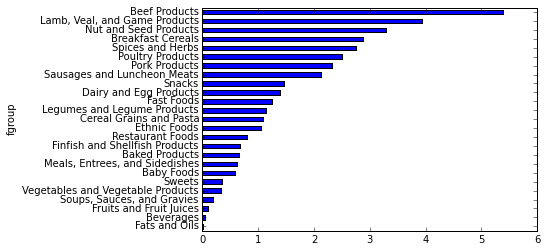

In [22]:
# We could do a plot of median values by food group and nutrient type.
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [28]:
# Lets find which food is most dense in each nutrient
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
get_maximum = lambda x: x.xs(x.value.idxmax()) 
get_minimum = lambda x: x.xs(x.value.idxmin())
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [29]:
max_foods

value  \
nutgroup    nutrient                                     
Amino Acids Alanine                              8.009   
            Arginine                             7.436   
            Aspartic acid                       10.203   
            Cystine                              1.307   
            Glutamic acid                       17.452   
            Glycine                             19.049   
            Histidine                            2.999   
            Hydroxyproline                       0.803   
            Isoleucine                           4.300   
            Leucine                              7.200   
            Lysine                               6.690   
            Methionine                           1.859   
            Phenylalanine                        4.600   
            Proline                             12.295   
            Serine                               4.600   
            Threonine                            3.300   
            Tryptophan                           1.600   
            Tyrosine                             3.300   
            Valine                               4.500   
Composition Adjusted Protein                    12.900   
            Carbohydrate, by difference        100.000   
            Fiber, total dietary                79.000   
            Protein                             88.320   
            Sugars, total                       99.800   
            Total lipid (fat)                  100.000   
            Water                              100.000   
Elements    Calcium, Ca                       7364.000   
            Copper, Cu                          15.050   
            Fluoride, F                        584.000   
            Iron, Fe                            87.470   
...                                                ...   
Vitamins    Cryptoxanthin, beta               6186.000   
            Dihydrophylloquinone               103.800   
            Folate, DFE                       2630.000   
            Folate, food                      2340.000   
            Folate, total                     2340.000   
            Folic acid                        1538.000   
            Lutein + zeaxanthin              39550.000   
            Lycopene                         46260.000   
            Menaquinone-4                       33.200   
            Niacin                              97.000   
            Pantothenic acid                    35.000   
            Retinol                          30000.000   
            Riboflavin                          14.300   
            Thiamin                             20.000   
            Tocopherol, beta                     6.490   
            Tocopherol, delta                   30.880   
            Tocopherol, gamma                  100.880   
            Vitamin A, IU                   100000.000   
            Vitamin A, RAE                   30000.000   
            Vitamin B-12                        98.890   
            Vitamin B-12, added                 24.000   
            Vitamin B-6                         12.000   
            Vitamin C, total ascorbic acid    2400.000   
            Vitamin D                        10000.000   
            Vitamin D (D2 + D3)                250.000   
            Vitamin D2 (ergocalciferol)         28.100   
            Vitamin D3 (cholecalciferol)        27.400   
            Vitamin E (alpha-tocopherol)       149.400   
            Vitamin E, added                    46.550   
            Vitamin K (phylloquinone)         1714.500   

                                                                                         food  
nutgroup    nutrient                                                                           
Amino Acids Alanine                                         Gelatins, dry powder, unsweetened  
            Arginine                                             Seeds, sesame flour, low-fat  
          

In [32]:
max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 